In [1]:
import os
if os.name != 'posix':
    %matplotlib ipympl
else:
    %matplotlib notebook
import scipy.constants as sc
from scipy.optimize import fsolve

import numpy as np
import cmath
import matplotlib.pyplot as plt
import scipy.constants as sc
plt.rcParams.update({
    "text.usetex": True,
    'text.latex.preamble': r"\usepackage{amsmath} \boldmath"
})
import os
import h5py

print(os.getpid())
%cd ../../

import pylib.mix as mix
import pylib.measurement as mse

2815
/media/work/docs/codes/QuCF/scripts-py


In [2]:
# --- Launch to change cells' width ---
from IPython.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

colors_ = ["blue", "red", "green", "gray", "black"]

from matplotlib import ticker
cmap_two_signs_= 'coolwarm'
cmap_two_signs_= 'Blues'
# cmap_two_signs_= 'Greys'
# cmap_two_signs_= 'Pastel1'
# cmap_two_signs_= 'flag'
# cmap_two_signs_= 'nipy_spectral'
# cmap_two_signs_= 'jet'
# cmap_two_signs_= 'seismic'
def fmt_(x, pos):
    a, b = '{:.2e}'.format(x).split('e')
    b = int(b)
    return r'${} \times 10^{{{}}}$'.format(a, b)

for i in range(10):
    plt.close()

In [13]:
# --- Global parameters ---
path_coef_ = "../QuCF/tests/compute-angles/inversion"
# filenames_ = [
#     "k20_eps4.hdf5", "k20_eps5.hdf5", 
#     "k20_eps6.hdf5", "k20_eps7.hdf5", 
#     "k20_eps8.hdf5", "k20_eps12.hdf5"
# ]
# filenames_ = ["k20_eps12.hdf5", "k20_eps4.hdf5"]
# filenames_ = ["k10_eps12.hdf5", "k20_eps12.hdf5"]
# filenames_ = ["k10_eps4.hdf5", "k20_eps4.hdf5", "k40_eps4.hdf5"]

filenames_ = ["k10_eps4.hdf5", "k40_eps4.hdf5"]

In [14]:
# -----------------------------------------
# --- Functions ----
# -----------------------------------------
def read_data_from_hdf5(filename):
    dd = {}
    
    full_filename = path_coef_ + "/" + filename
    print("\n\n--------------------------------------------------------------------------------")
    print("--- Reading angles from the file \n{:s}".format(full_filename))
    with h5py.File(full_filename, "r") as f:
        gr = f["basic"]
        dd["date-of-simulation"] = gr["date-of-simulation"][()].decode("utf-8")

        dd["function-type"]       = gr["function-type"][()].decode("utf-8")
        dd["function-parity"]     = gr["function-parity"][()]
        dd["function-parameter"]  = gr["function-parameter"][()]
        dd["abs-error"]           = gr["abs-error"][()]
        dd["factor-norm"]         = gr["factor-norm"][()]

        gr = f["results"]
        dd["x"] = np.array(gr["x"]) # Chebyschev roots (nodes);
        dd["pol-coefs"] = np.array(gr["pol-coefs"]) # the polynomial constructed using coefficients;
        dd["pol-angles"] = np.array(gr["pol-angles"]) # the polynomial constructed using computed angles;
        dd["phis"] = np.array(gr["phis"])
    
    # print some basic results:
    print("when simulated: ", dd["date-of-simulation"])
    print()
    print("function-type: \t\t{:s}".format(dd["function-type"]))
    print("function-parity: \t\t{:d}".format(dd["function-parity"]))
    print("param: \t\t\t{:f}".format(dd["function-parameter"]))
    print("absolute error: \t{:0.3e}".format(dd["abs-error"]))
    print("norm. factor: \t\t{:0.3e}".format(dd["factor-norm"]))
    return dd

In [15]:
# -----------------------------------------
# --- Read data ----
# -----------------------------------------
dds_ = []
for ii in range(len(filenames_)):
    dds_.append(read_data_from_hdf5(filenames_[ii]))
del ii



--------------------------------------------------------------------------------
--- Reading angles from the file 
../QuCF/tests/compute-angles//k10_eps4.hdf5
when simulated:  12-07-2023 14:10:11

function-type: 		inversion
function-parity: 		1
param: 			10.000000
absolute error: 	1.189e-04
norm. factor: 		1.250e-01


--------------------------------------------------------------------------------
--- Reading angles from the file 
../QuCF/tests/compute-angles//k40_eps4.hdf5
when simulated:  12-07-2023 14:14:01

function-type: 		inversion
function-parity: 		1
param: 			40.000000
absolute error: 	1.657e-04
norm. factor: 		1.250e-01


<IPython.core.display.Javascript object>


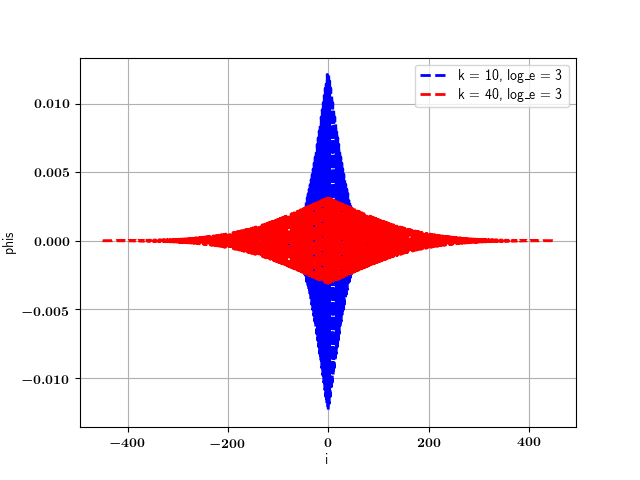

In [16]:
# -----------------------------------------
# --- Plot angles ----
# -----------------------------------------
 
fig = plt.figure()
ax = fig.add_subplot(111)

for ii in range(len(filenames_)): 
    Nphis = len(dds_[ii]["phis"]) 
    x_array = np.array(range(Nphis)) - Nphis/2
    ax.plot(
        x_array, 
        dds_[ii]["phis"] - np.pi/2., 
        color=colors_[ii], 
        linewidth = 2, linestyle='--',  
        label = "k = {:d}, log_e = {:d}".format(
            int(dds_[ii]["function-parameter"]),
            -int(np.log10(dds_[ii]["abs-error"]))
        )
    )
plt.xlabel('i')
plt.ylabel("phis")
ax.legend()
plt.grid(True)
plt.show()

del ii

In [10]:
print(np.max(dds_[0]["phis"]) - np.pi/2.)
print(np.max(dds_[1]["phis"]) - np.pi/2.)
print(np.max(dds_[2]["phis"]) - np.pi/2.)

0.012129141838518764
0.006157813138767176
0.0031020218411594858


In [11]:
0.012129141838518764/4.

0.003032285459629691